In [ ]:
!pip install wordcloud



In [ ]:
import numpy as np
from sklearn import metrics
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer







In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Reviews = pd.read_csv("Womens Clothing E-Commerce Reviews.csv",engine='python',encoding='utf-8', error_bad_lines=False)

Reviews.head()


Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews.csv


,Unnamed: 0,Clothing ID,Age,Title,reviewText,overall rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
#Creating a copy
train=Reviews.copy()

#Checking for null values
train.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
reviewText                  845
overall rating                0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
#Removing null values

#removing only those rows that have null in the reviews and title columns
train=train.dropna(axis=0, subset=['reviewText', 'Title'])

train.isnull().sum()

Unnamed: 0                  0
Clothing ID                 0
Age                         0
Title                       0
reviewText                  0
overall rating              0
Recommended IND             0
Positive Feedback Count     0
Division Name              13
Department Name            13
Class Name                 13
dtype: int64

In [ ]:

train['reviews']=train['reviewText']+train['Title']
train=train.drop(['reviewText', 'Title'], axis=1)


train.head()

,Unnamed: 0,Clothing ID,Age,overall rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,reviews
2,2,1077,60,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl..."
4,4,847,47,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...
5,5,1080,49,2,0,4,General,Dresses,Dresses,"I love tracy reese dresses, but this one is no..."
6,6,858,39,5,1,1,General Petite,Tops,Knits,I aded this in my basket at hte last mintue to...


In [ ]:
train['overall rating'].value_counts()


5    10871
4     4289
3     2464
2     1360
1      691
Name: overall rating, dtype: int64

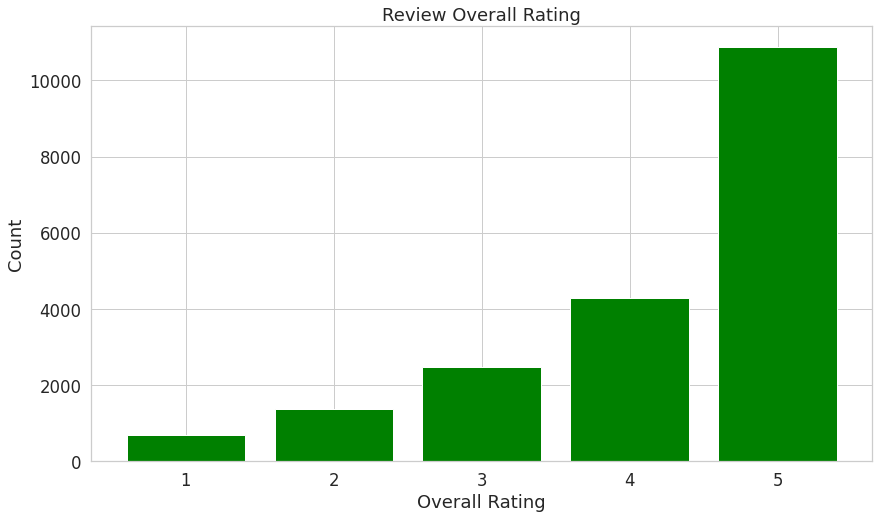

In [ ]:
#plotting a bar chart of rating counts

# x-coordinates 
left = [1, 2, 3, 4, 5] 

# counts of each rating
one=len(train[train['overall rating'] == 1])
two= len(train[train['overall rating'] == 2])
three=len(train[train['overall rating'] == 3])
four=len(train[train['overall rating'] == 4])
five=len(train[train['overall rating'] == 5])

#y-coordinates
height = [one, two,three, four, five]
tick_label = ['1', '2', '3', '4', '5']
plt.bar(left, height, tick_label = tick_label, width=0.8,color = ['green'])
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.title('Review Overall Rating')  
plt.show()

In [ ]:
def sentimentchecker(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
  
    if row['overall rating'] == 1.0 or row['overall rating'] == 2.0 or row['overall rating'] == 3.0:
        val = -1 # 'Negative'
    elif row['overall rating'] == 4.0 or row['overall rating'] == 5.0:
        val = 1 #'Positive'
    else:
        val = -2
    return val


train['sentiment'] = train.apply(sentimentchecker, axis=1)
train.head()

,Unnamed: 0,Clothing ID,Age,overall rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,reviews,sentiment
2,2,1077,60,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...,-1
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl...",1
4,4,847,47,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...,1
5,5,1080,49,2,0,4,General,Dresses,Dresses,"I love tracy reese dresses, but this one is no...",-1
6,6,858,39,5,1,1,General Petite,Tops,Knits,I aded this in my basket at hte last mintue to...,1


In [ ]:
train['sentiment'].value_counts()

 1    15160
-1     4515
Name: sentiment, dtype: int64

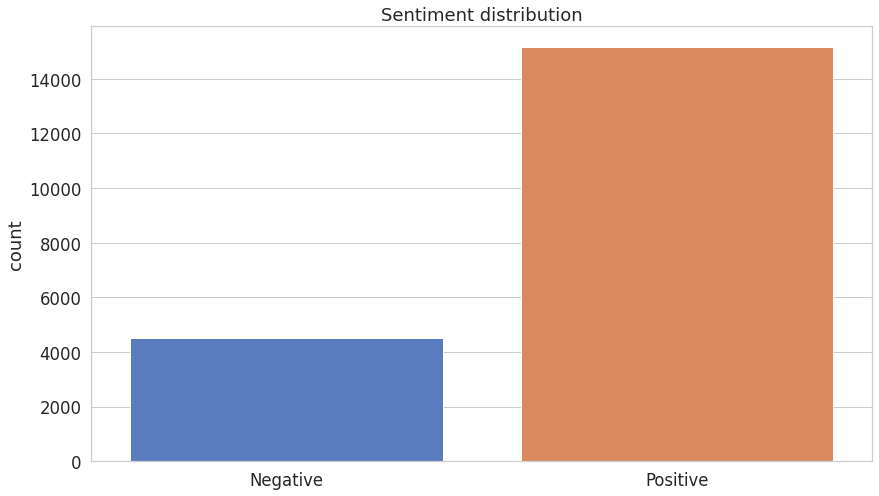

In [ ]:
def SentimentDist(X):
  Graph = sns.countplot(x='sentiment', data=X)
  Graph.set_title("Sentiment distribution")

  Graph.set_xticklabels([ 'Negative', 'Positive'])
  plt.xlabel("");

SentimentDist(train)

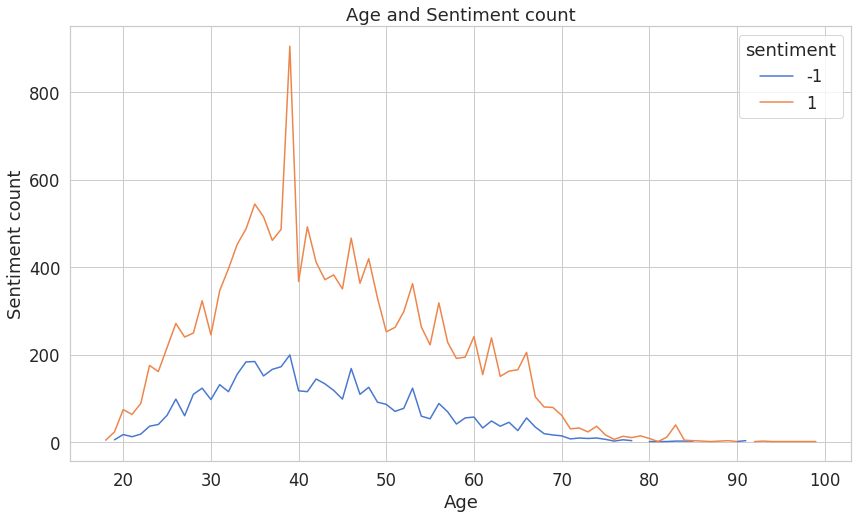

In [ ]:
def AgeSentiment(X):
  X.groupby(['Age','sentiment'])['sentiment'].count().unstack().plot(legend=True)
  plt.title('Age and Sentiment count')
  plt.xlabel('Age')
  plt.ylabel('Sentiment count')
  plt.show()

AgeSentiment(train)

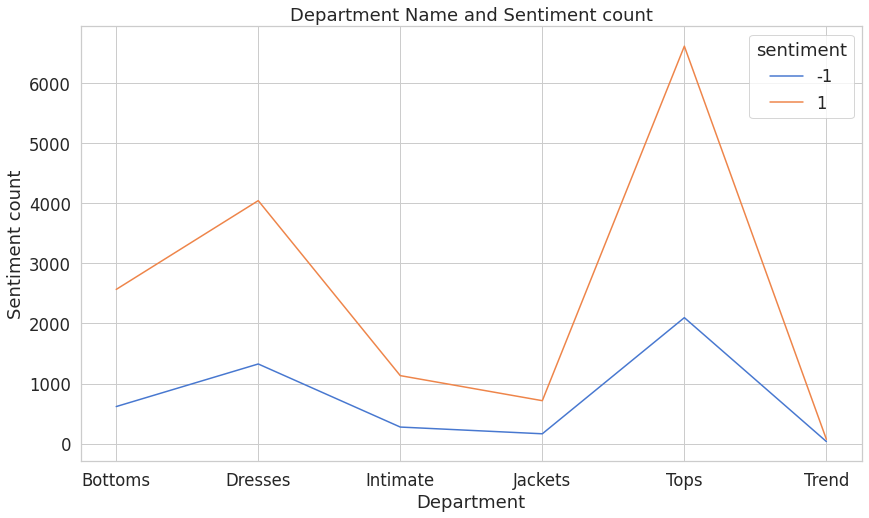

In [ ]:
def DeptSentiment(X):
  X.groupby(['Department Name','sentiment'])['sentiment'].count().unstack().plot(legend=True)
  plt.title('Department Name and Sentiment count')
  plt.xlabel('Department')
  plt.ylabel('Sentiment count')
  plt.show()

DeptSentiment(train)

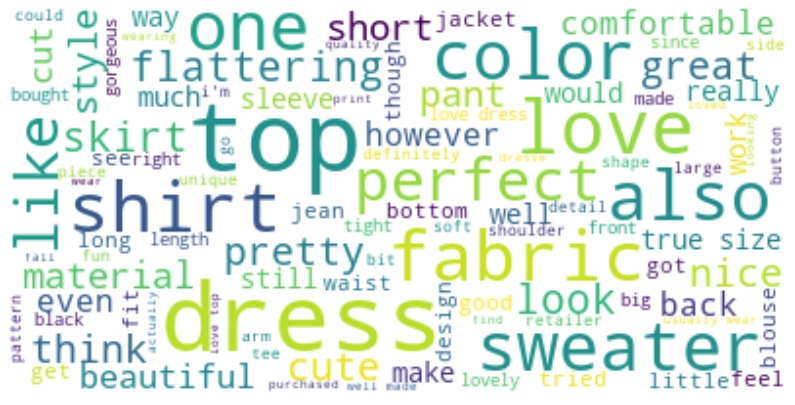

In [ ]:
text = " ".join(reviews for reviews in train.reviews)


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('wordnet')

stop_words = stopwords.words('english')
def cleaningData(data):
    
    #Tokenize and lowercasing
    tokens = word_tokenize(data.replace("'", "").lower()) 
        
    #Punctuation Eraser
    removePunct = [w for w in tokens if w.isalpha()]  
    
    #Removing Stopwords
    removeStopWords = [t for t in removePunct if t not in stop_words]
    
    #lemmatizing
    text = [WordNetLemmatizer().lemmatize(t) for t in removeStopWords]
        
    #joining
    return " ".join(text)

train['reviews'] = train['reviews'].apply(cleaningData)
train['reviews'].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
5    love tracy reese dress one petite foot tall us...
6    aded basket hte last mintue see would look lik...
Name: reviews, dtype: object

In [ ]:
input=train['reviews'].values
#input=[input]

cnt_vectorizer = CountVectorizer()
features = cnt_vectorizer.fit_transform(input)
features_nd = features.toarray()
print(features_nd)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
y = train['sentiment'].values

X_train, X_test, y_train, y_test  = train_test_split(features_nd, y, test_size=0.25,train_size=0.75, random_state=1234)

In [ ]:
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [ ]:
from sklearn.metrics import f1_score
MNB=MultinomialNB()
MNB.fit(X_train, y_train)

#testing
y_pred = MNB.predict(X_test)
#accuracy_score(y_test,y_pred)
print(f1_score(y_test,y_pred))

0.9220044719189793


In [ ]:
#naive bayes attempt 2
MNB=MultinomialNB(alpha = 0)
MNB.fit(X_train, y_train)

#testing
y_pred = MNB.predict(X_test)
#accuracy_score(y_test,y_pred)
print(f1_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


0.887741593857559


In [ ]:
#naive bayes attempt 5
MNB=MultinomialNB(alpha = 1,  fit_prior=False)
MNB.fit(X_train, y_train)

#testing
y_pred = MNB.predict(X_test)
#accuracy_score(y_test,y_pred)
print(f1_score(y_test,y_pred))

0.9129903624270395


In [ ]:
# random forest attempt 1
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(f1_score(y_test,y_pred))

In [ ]:
# random forest attempt 2
clf=RandomForestClassifier(n_estimators=150)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(f1_score(y_test,y_pred))

In [ ]:
# random forest attempt 4
clf=RandomForestClassifier(n_estimators=100, criterion='entropy')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(f1_score(y_test,y_pred))

0.8999161308358959


In [ ]:
# decision tree attempt 1
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=6, criterion = 'entropy')
dt = dt.fit(X_train, y_train)
#tree.plot_tree(dt)



In [ ]:
# decision tree attempt 2
dt = tree.DecisionTreeClassifier(max_depth=10, max_leaf_nodes = 8, criterion='entropy')
dt = dt.fit(X_train, y_train)

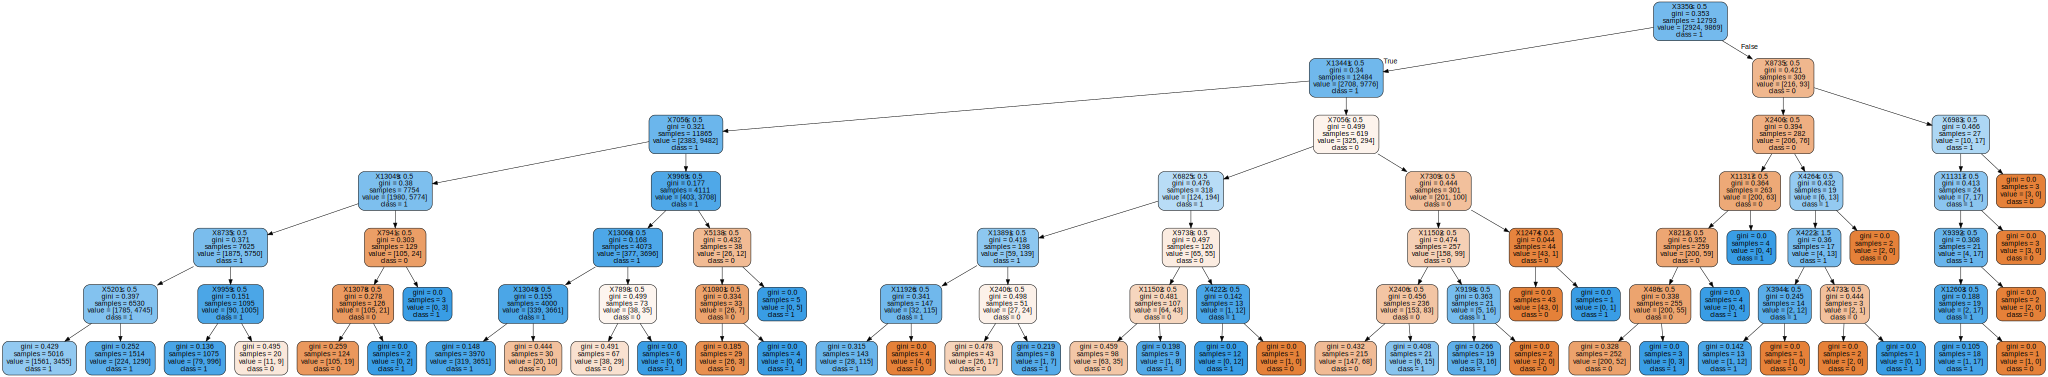

In [ ]:

import graphviz 
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(dt, out_file=None, 
                                

class_names=['0','1'],  
filled=True, rounded=True,  
special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
y_pred=dt.predict(X_test)
#print(y_pred)
print(f1_score(y_test,y_pred))
#accuracy_score(y_test,y_pred)

0.8706979295214591


In [ ]:
# gradient boost attempt 1
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=5, learning_rate = 0.2)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print(f1_score(y_test,gb_pred))

In [ ]:
# gradient boost attempt 2
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.2)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print(f1_score(y_test,gb_pred))

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=200, learning_rate = 0.5)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print(f1_score(y_test,gb_pred))

In [ ]:
#k nearest neighbours attempt 1
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(f1_score(y_test,y_pred))

In [ ]:
# k nearest neighboours attempt 2
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(f1_score(y_test,y_pred))


In [ ]:
# k nearest neighboours attempt 3
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=17, weights='distance', p=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(f1_score(y_test,y_pred))

0.8667380251538668


In [ ]:
#calculating the accuracy score
accuracy_score(y_test, y_pred)


In [ ]:
#printing the classification report to measure the quality of the prediction using Naive Bayes Classifier


print(classification_report(y_test, y_pred))


In [ ]:
#printing the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 915,  234],
       [ 407, 3363]])

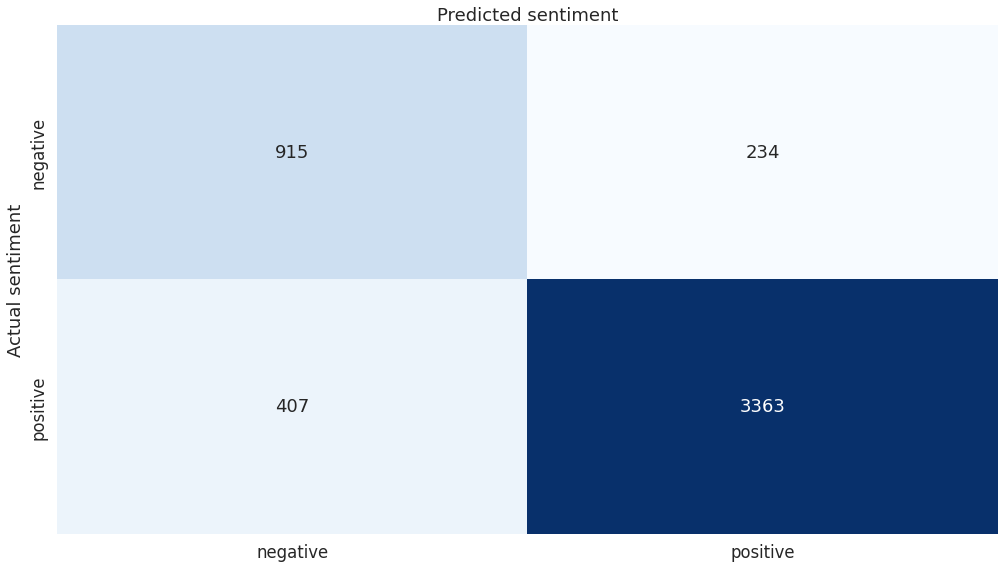

In [ ]:
#visualizing confusion matrix using heatmap
#heatmap source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
class_names = ["negative", "positive"]
fig,ax = plt.subplots()


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual sentiment')
plt.xlabel('Predicted sentiment');